In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set(rc={'figure.figsize':(6, 4)})
sns.set_style('white')
sns.despine()

<Figure size 600x400 with 0 Axes>

In [382]:
def generate1():  
    while True:  
        x = np.random.uniform(1, 3)  
        y = np.random.uniform(1, 3)  
        if (x - 1) ** 2 + (y - 3) ** 2 > 2:  
            continue  
        return x, y
def generate2():  
    while True:  
        x = np.random.uniform(2, 4)  
        y = np.random.uniform(4, 7)  
        if (x - 4) ** 2 + (y - 5) ** 2 > 2:  
            continue  
        return x, y

In [383]:
n = 200
feature = []
target = []

In [384]:
for i in range(n):
    x, y = generate1()
    feature.append([1, x, y])
    target.append(1)

    x, y = generate2()
    feature.append([-1, x, y])
    target.append(-1)

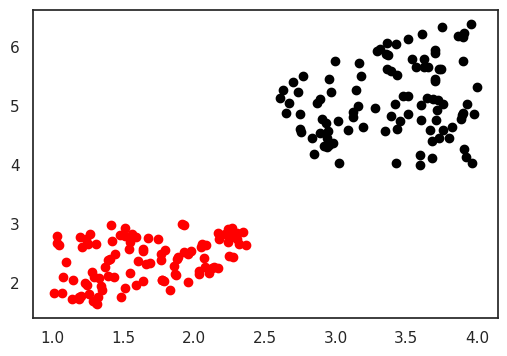

In [385]:
for i in range(n):
    if target[i] == 1:
        plt.scatter(feature[i][1], feature[i][2], color='red')
    else:
        plt.scatter(feature[i][1], feature[i][2], color='black')

In [386]:
class LogisticRegression():
    def __init__(self, iterations=100, learning_rate=0.1, verbose=50, silence='False'):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.verbose = verbose
        self.silence = silence

        self.init_weights()

    def init_weights(self):
        self.w = np.ones(3)# хз как сайз features узнать тут

    def computeGradient(self, X, y):
        grad = [0] * len(self.w)
        exponenta = np.exp(-y * (self.w[0] + self.w[1] * X[1] + self.w[2] * X[2]))
        grad[0] = - exponenta * y * X[0] / (1 + exponenta)
        grad[1] = - exponenta * y * X[1] / (1 + exponenta)
        grad[2] = - exponenta * y * X[2] / (1 + exponenta)
        
        return grad
    
    def sigmoid(self, x):                                        
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        for i in range(self.iterations):
            for j in range(len(X)):
                grad = self.computeGradient(X[j], y[j])
                self.w[0] -= self.learning_rate * grad[0]
                self.w[1] -= self.learning_rate * grad[1]
                self.w[2] -= self.learning_rate * grad[2]

            if i <= 10:
                for k in range(n):
                    if target[i] == 1:
                        plt.scatter(X[k][1], X[k][2], color='red')
                    else:
                        plt.scatter(X[k][1], X[k][2], color='black')

                x0 = np.random.uniform(6, 8)
                y0 = -(self.w[1] * x0 + self.w[0]) / self.w[2]

                x1 = np.random.uniform(-4, -2)
                y1 = -(self.w[1] * x1 + self.w[0]) / self.w[2]

                plt.plot([x0, x1], [y0, y1])
                plt.show()

        return self.w

    def predict(self, X):
        pred = []
        for i in range(len(X)):
            pred.append(self.sigmoid((self.w[0] + self.w[1] * X[i][1] + self.w[2] * X[i][2])))
        
        return pred


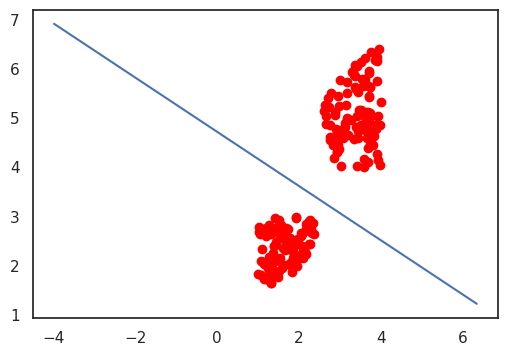

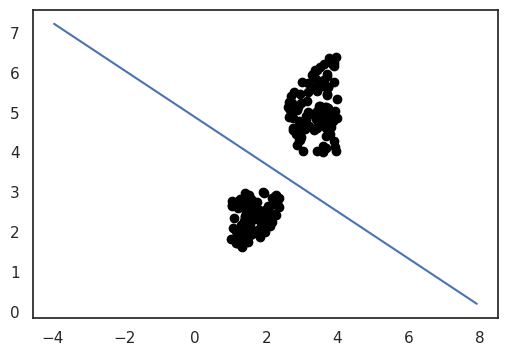

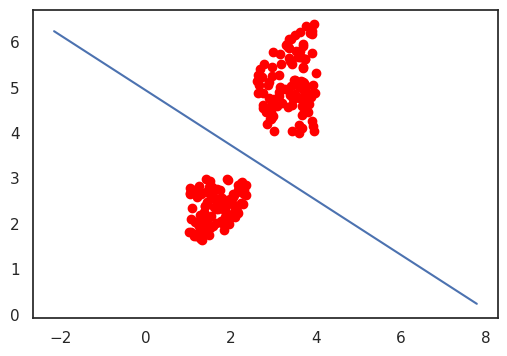

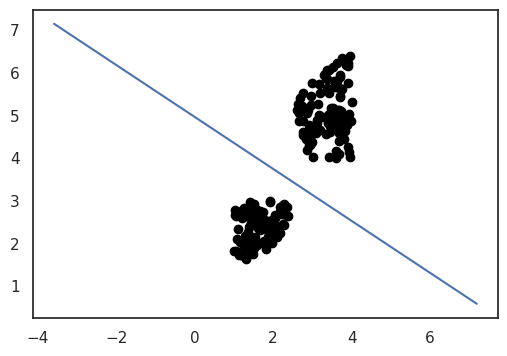

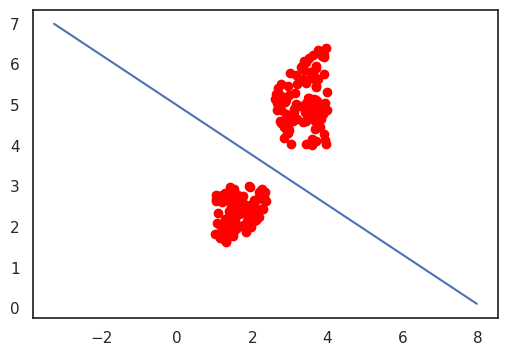

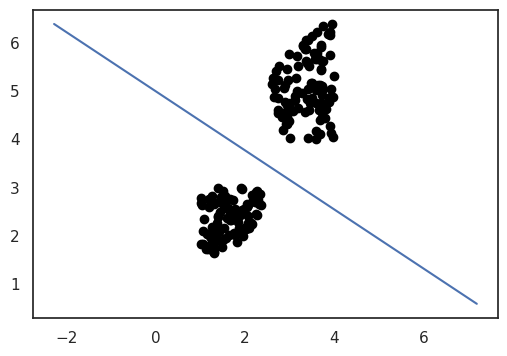

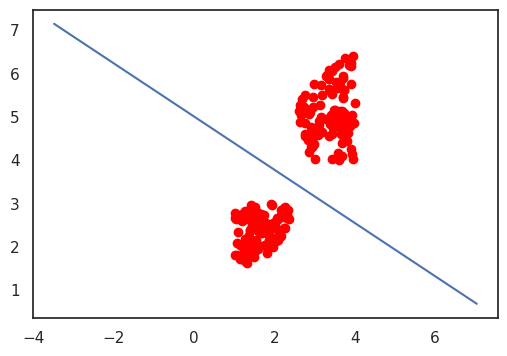

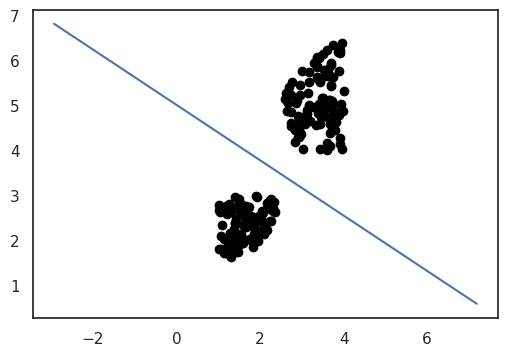

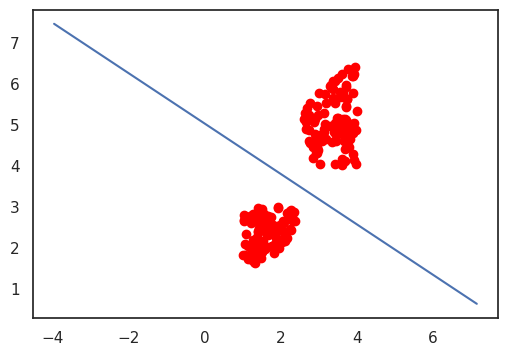

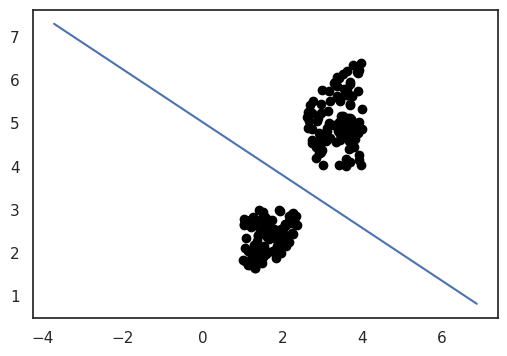

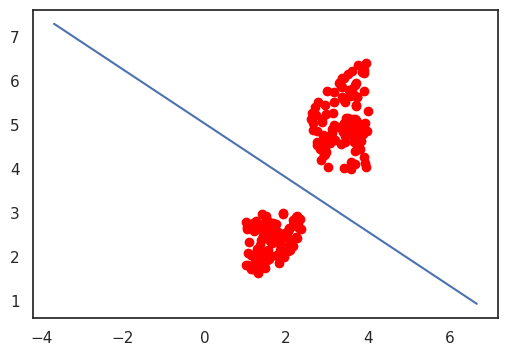

In [387]:
model = LogisticRegression()
w = model.fit(feature, target)

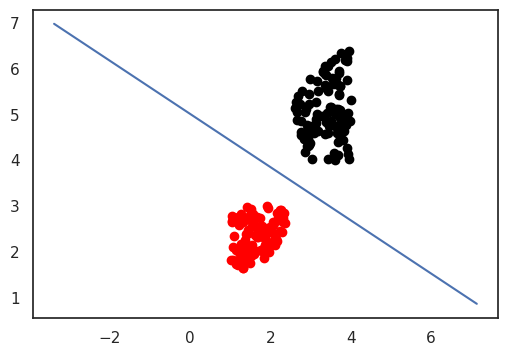

In [388]:
for i in range(n):
    if target[i] == 1:
        plt.scatter(feature[i][1], feature[i][2], color='red')
    else:
        plt.scatter(feature[i][1], feature[i][2], color='black')

x0 = np.random.uniform(6, 8)
y0 = -(w[1] * x0 + w[0]) / w[2]

x1 = np.random.uniform(-4, -2)
y1 = -(w[1] * x1 + w[0]) / w[2]

plt.plot([x0, x1], [y0, y1])

In [389]:
def generate11():  
    while True:  
        x = np.random.uniform(-2, 3)  
        y = np.random.uniform(1, 3)  
        if (x + 4) ** 2 + (y - 3) ** 2 > 10:  
            continue  
        return x, y
def generate22():  
    while True:  
        x = np.random.uniform(2, 9)  
        y = np.random.uniform(4, 7)  
        if (x - 4) ** 2 + (y - 5) ** 2 > 2:  
            continue  
        return x, y

In [390]:
feature_1 = []
target_1 = []

for i in range(n):
    x, y = generate11()
    feature_1.append([1, x, y])
    target_1.append(1)

    x, y = generate22()
    feature_1.append([-1, x, y])
    target_1.append(-1)


In [391]:
pred = model.predict(feature_1)

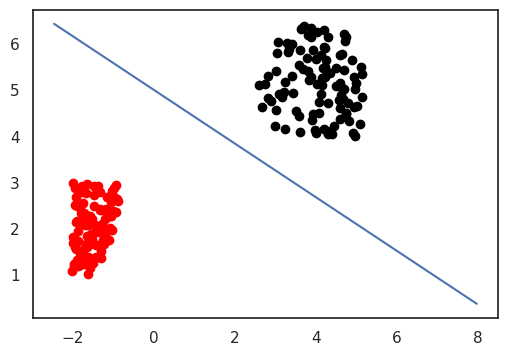

In [392]:
x0 = np.random.uniform(6, 8)
y0 = -(w[1] * x0 + w[0]) / w[2]

x1 = np.random.uniform(-4, -2)
y1 = -(w[1] * x1 + w[0]) / w[2]

plt.plot([x0, x1], [y0, y1])

for i in range(n):
    if target_1[i] == 1:
        plt.scatter(feature_1[i][1], feature_1[i][2], color='red', alpha=pred[i])
    else:
        plt.scatter(feature_1[i][1], feature_1[i][2], color='black', alpha=1 - pred[i])

plt.show()